# Limites de cantidad de resultados:
## https://dev.twitter.com/rest/public/rate-limits


<table> <tr> <th>Title</th>	<th>Resource family</th>	<th>Requests / 15-min window (user auth)</th>	<th>Requests / 15-min window (app auth)</th></tr>
<tr> <td>GET search/tweets</td>	<td>search</td>	<td>180</td>	<td>450</td> </tr>
<td>GET followers/list</td>	<td>followers</td>	<td>15</td>	<td>30</td>
</table>

## Autenticación de App

In [44]:
# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="fshtLxpED9vXbZl5gVkaSowGr"
consumer_secret = "H2qEQC4wU2a1IkbKpNMlVbac1IV0vWlZMPmoyfyAVZCmZfUuZa"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-BAi7czgq59etPjYpZWFfJHOHIf048vaxsJ9G9Yo"
access_token_secret = "mpIeF0mEGjFTwUIUtd9nr20nu8O675zEFZlVPuTt12jcF"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

print "Autenticado"
#print api.rate_limit_status()
#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")

Autenticado


In [34]:
places = api.geo_search(query="Argentina", granularity="country")


In [38]:
print len(places)

place_id = places[0].id
print('El id de Argentina es: ',place_id)

1
('El id de Argentina es: ', u'4d3b316fe2e52b29')


In [54]:
api.rate_limit_status()['resources']['search']

{u'/search/tweets': {u'limit': 450, u'remaining': 450, u'reset': 1480027319}}

# Busco tweets con localización en Bs As

In [ ]:

i= 0
results = []
#maxid = results2[-1][-1].id - 1

#,max_id=maxId,since_id=sinceId

all_tweets = []

maxId = 1000000000000000000000000000
sinceId = -1
for tweet in tweepy.Cursor(api.search, count=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    #print(tweet.id)
    i += 1
    if i % 100 == 0:
        print i
    all_tweets.append(tweet)
        
    #maxId = results[-1][-1].id - 1  
    #for t in results[i]:
    #    all_tweets.append(t)
    #    if t.id > sinceId:
    #        sinceId = t.id
    #        print sinceId
print len(results)

print len(all_tweets)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200


In [48]:
print len(all_tweets)
print all_tweets[0].id

44832
801904428215365633


## Me fijo si hay repetidos

In [49]:
  
ids = [tweet.id for tweet in all_tweets]
    
#print ids.sort()
print len(ids)

import collections
repetidos =  [item for item, count in collections.Counter(ids).items() if count > 1]
print "Hay " + str(len(repetidos)) + " repetidos"

44832
Hay 0 repetidos


## Veo cantidad de tweets con localización

In [63]:
places_dict = {}
coord = []
places2 = []
no_place = []
tot = 0.0

for tweet in all_tweets:
    tot +=1
    if tweet.place != None:
        coord.append(tweet.coordinates)
        #print tweet.place.full_name
        places2.append(tweet.place.name)
        places_dict[tweet.place.name] = 1 if not places_dict.has_key(tweet.place.name) else places_dict[tweet.place.name] + 1
    else:
        no_place.append(tweet)
            
print "Hay " + str(int(tot)) + " tweets en total"

print "\nLa cantidad de tweets con coordenadas es: " + str(len(coord))

print ("Es decir el %d por ciento" %(len(coord)/tot*100))

print "\nLa cantidad de tweets sin campo place: " + str(len(no_place))

#print len(places2)/tot

a = len(places2) /15.0
print str(a) + " tweets localizados por minuto"

cant = 200
print "Haciendo " + str(cant) + " bots tendriamos " + str(int(a*cant)) + " por minuto"

#for w in sorted(places_dict, key=places_dict.get, reverse=True):
#  print w, places_dict[w]


Hay 44832 tweets en total

La cantidad de tweets con coordenadas es: 1961
Es decir el 4 por ciento

La cantidad de tweets sin campo place: 42871
130.733333333 tweets localizados por minuto
Haciendo 200 bots tendriamos 26146 por minuto


## Hago Histograma de lugares con localización

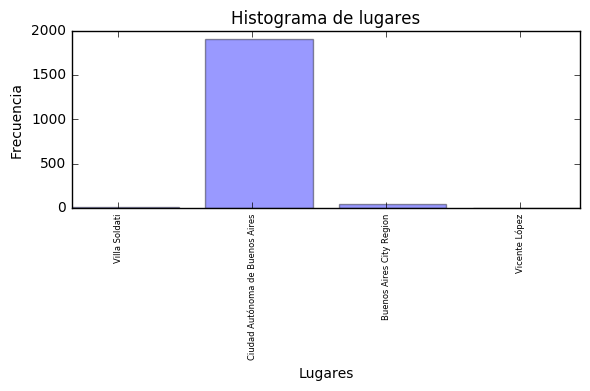

In [51]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(places_dict.keys()))
bar_width = 0.35

opacity = 0.4
plt.xticks(index + bar_width, places_dict.keys(), size=6, rotation="vertical")
plt.bar(range(len(places_dict.values())),places_dict.values(),alpha=opacity,
                 color='b',)
plt.tight_layout()
plt.show()






## Hago Lista de lugares sin localización (búsqueda por perfil)

In [52]:
locations_dict = {}
locations = []
for tweet in no_place:
    if tweet.user.location != None:
        locations.append(tweet.user.location)
        location = tweet.user.location
    if not locations_dict.has_key(location):
            locations_dict[location] = 1  
    else:
        locations_dict[location]  +=  1

print "# locations = " + str(len(locations))
#print locations_dict

canti = 20
for w in sorted(locations_dict, key=locations_dict.get, reverse=True)[:canti]:
    print w, locations_dict[w]



# locations = 42871
Buenos Aires, Argentina 14030
 8011
Buenos Aires 3364
Argentina 1188
Buenos Aires, Argentina  402
Buenos Aires, Argentina. 360
Buenos Aires  352
Ciudad Autónoma de Buenos Aire 343
Buenos Aires - Argentina 332
buenos aires 296
Córdoba, Argentina 216
argentina 211
Buenos Aires Argentina 174
Rosario, Argentina 166
Argentina, Buenos Aires 152
La Plata, Argentina 117
Buenos aires 106
Buenos Aires. 99
Quilmes, Argentina 94
ARGENTINA 84


## Hago histograma de lugares sin localización (búsqueda por perfil)

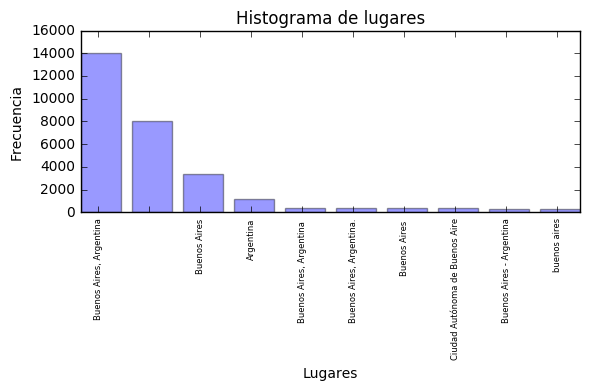

In [53]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(locations_dict.keys()))
bar_width = 0.35


cant = 10
valores = sorted(locations_dict.values(),reverse=True)
claves = sorted(locations_dict, key=locations_dict.get,reverse=True)




opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

